In [2]:
%matplotlib inline
import seaborn
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (16, 9)

# Nevazká Burgersova rovnice

> **Burgersova rovnice** je jednou ze základních parciálních diferenciálních rovnic mechaniky tekutin. Objevuje se v mnoha partiích aplikované matematiky, jako je například dynamika plynů a modelování dopravního toku. Rovnice je pojmenována po J. M. Burgersovi (1895–1981). Je ekvivalentní Navierově-Stokesově rovnici pro nestlačitelný tok bez tlakového členu. -- [Wiki](https://cs.wikipedia.org/wiki/Burgersova_rovnice)

* Najděte numerické řešení na intervalu $x = [1, 2]$ při počátečních podmínkách $u = 1$ pro $x \leq 1.5$ a $u = 0$ pro $x > 1.5$.

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0
$$

To zní jako výzva! Ale než se bezhlavě vrhneme do jejího řešení, připravíme si napřed vše co budeme potřebovat. Knihovna Numpy je defacto zlatý standard v oblasti numerických výpočtů za pomoci programovacího jazyka Python. Matplotlib představuje z dnešního pohledu již nízko úrovňové API pro vykreslování publikování hodných grafů. Nad ním pak staví i další knihovny pro vykreslování dat získávaných z obsáhlých databází. Interaktivní widgety umožňují přímé zkoumání studovaného systému.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact

## Laxova metoda

Je jednou z nejjednoduších metod, hojně využivanou v numerické hydrodynamice. Dostaneme ji
nahrazením $u_i^{n}$ v časové derivaci v rovnici (FTCS) průměrnou hodnotou určenou z jejich sousedů

$$
u_{i}^{n} \approx \frac{(u_{i+1}^{n}+u_{i-1}^n)}{2}.
$$

Obdržíme Laxovo diferenční schéma

$$
u_i^{n+1} = \frac{1}{2} \left( u_{i+1}^n + u_{i-1}^n \right) - \frac{1}{2} \frac{v \Delta t}{\Delta x} \left( u_{i+1}^n - u_{i-1}^n \right) + D \frac{\Delta t}{(\Delta x)^2} \left( u_{i+1}^n - 2 u_i^n + u_{i-1}^n \right)
$$

které až na poslední člen, vypadá zapsáno v jazyce Python následovně...

In [4]:
def lax_method(u, dx, dt, v, time):
    """Solution using Lax method"""
    for t in range(time):
        uu = np.copy(u)
        for i in range(1, len(u)-1):
            u[i] = 0.5 * (uu[i+1] + uu[i-1]) \
                 - 0.5 * v * dt / dx * (uu[i+1] - uu[i-1])
    return u

Nyní nám již nic nebrání ve vykreslení výsledku výpočtu v určitém čase pro zadané meze parametrů. Pro tuto mimořádnou příležitost si definujme zvláštní funkci, která kromě nastavení počátečních podmínek obstarává i samotnou grafickou prezentaci.

In [5]:
def plot_result(dx=0.01, dt=0.01, velocity=0.1, time=200):
    """Interactivly plot the result"""
    ## initial conditions
    x = np.linspace(1, 2, 1/dx)
    u = np.ones_like(x)
    u[x > 1.5] = 0
    ## plot the result
    plt.title("Burgers' equation")
    plt.xlabel("x")
    plt.ylabel("u")
    plt.plot(x, lax_method(u, dx, dt, velocity, time))
    plt.grid(True)

Ti hraví z vás, kteří si to zkoušíte sami, ho doufám vydíte i s avízovanými interaktivními prvky.

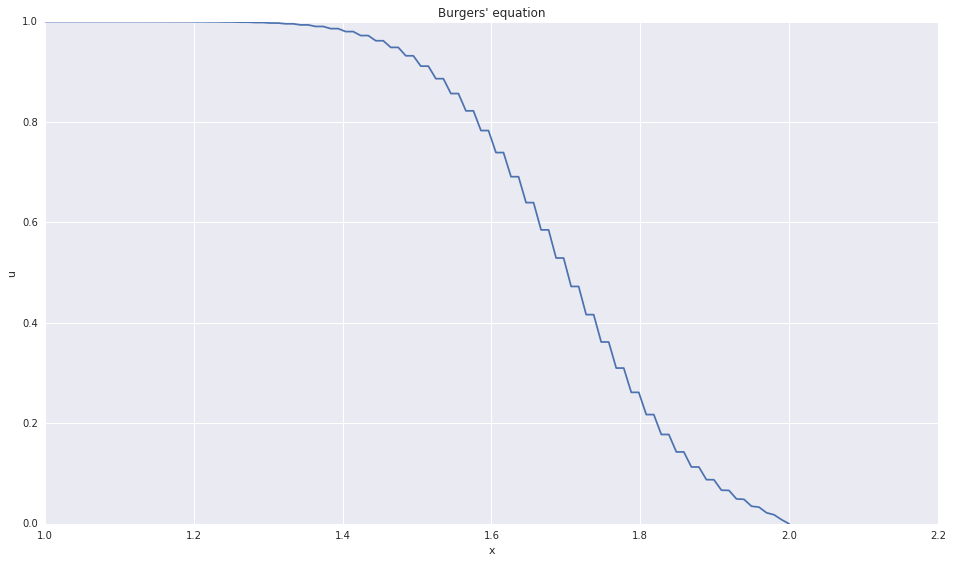

In [6]:
interact(plot_result, dx=(1e-3, 1e-1, 1e-3), dt=(1e-3, 1, 1e-2),
         velocity=(0.01, 1, 1e-2),  time=(0, 1000));

### Úkoly pro studenty

* Použijte sofistikovanější schéma výpočtu a výsledky vzájemně porovnejte.
* Rozšiřte výpočet i do dalších prostorových dimenzí.